### Метод для подсчета всех оттенков цветов и пикселов

In [6]:
img_cv2 = cv2.imread("/home/lev/Desktop/data_management/jupyter_notebooks/img/test.png")

# get rgb image
def get_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img_rgb = get_rgb(img_cv2)

# подсчет количества пикселей по уникальным цветам в изображении с помощью CV2
colors = []
cv2_dict = {}
for row in img_rgb:
    for pixel in row:
        colors.append(tuple(pixel))

for c in colors:
    if c in cv2_dict:
        cv2_dict[c] += 1
    else:
        cv2_dict[c] = 1
        
colors_rgb = dict(sorted(cv2_dict.items(), key = lambda x:x[1], reverse=True))
len(colors_rgb)

301

In [7]:
colors_rgb

{(235, 253, 255): 253,
 (236, 254, 255): 44,
 (237, 255, 255): 40,
 (238, 255, 255): 33,
 (239, 255, 255): 16,
 (213, 228, 230): 12,
 (43, 42, 41): 11,
 (166, 177, 178): 10,
 (39, 37, 36): 10,
 (146, 155, 156): 10,
 (66, 67, 66): 10,
 (82, 85, 84): 10,
 (45, 44, 43): 6,
 (44, 43, 42): 6,
 (179, 191, 192): 5,
 (54, 54, 53): 5,
 (46, 45, 44): 5,
 (80, 83, 83): 4,
 (64, 65, 64): 4,
 (123, 130, 130): 4,
 (240, 255, 255): 4,
 (236, 255, 255): 4,
 (128, 135, 136): 4,
 (217, 233, 235): 4,
 (235, 254, 255): 3,
 (167, 178, 179): 3,
 (224, 241, 243): 3,
 (215, 231, 233): 3,
 (47, 46, 45): 3,
 (53, 53, 52): 3,
 (116, 122, 122): 3,
 (48, 48, 47): 3,
 (61, 62, 61): 3,
 (74, 76, 75): 3,
 (186, 199, 200): 3,
 (49, 49, 48): 3,
 (174, 186, 187): 3,
 (42, 41, 40): 3,
 (241, 255, 255): 3,
 (233, 251, 253): 3,
 (233, 250, 252): 3,
 (161, 172, 173): 3,
 (107, 112, 112): 3,
 (64, 65, 65): 3,
 (205, 220, 222): 3,
 (147, 156, 157): 2,
 (218, 234, 236): 2,
 (101, 106, 106): 2,
 (114, 121, 121): 2,
 (145, 154, 

### Метод для подсчета всех оттенков цветов #2

In [4]:
import numpy as np
from PIL import Image

def palette(img):
    """
    Return palette in descending order of frequency
    """
    arr = np.asarray(img)
    palette, index = np.unique(asvoid(arr).ravel(), return_inverse=True)
    palette = palette.view(arr.dtype).reshape(-1, arr.shape[-1])
    count = np.bincount(index)
    order = np.argsort(count)
    return palette[order[::-1]]

def asvoid(arr):
    """View the array as dtype np.void (bytes)
    This collapses ND-arrays to 1D-arrays, so you can perform 1D operations on them.
    http://stackoverflow.com/a/16216866/190597 (Jaime)
    http://stackoverflow.com/a/16840350/190597 (Jaime)
    Warning:
    >>> asvoid([-0.]) == asvoid([0.])
    array([False], dtype=bool)
    """
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))

In [721]:
img = Image.open("/home/lev/Desktop/data_management/jupyter_notebooks/img/test.jpg", 'r').convert('RGB')
print(palette(img)[:3])

[[235 253 255]
 [236 254 255]
 [237 255 255]]


### Метод для подсчета доли белого в изображении

In [68]:
# get rgb image
def get_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def calculate_white_share(path="/home/lev/Desktop/diploma_local/nice_design/16.png"):
    img_cv2 = cv2.imread(path)
    
    img_rgb = get_rgb(img_cv2)
    # подсчет количества пикселей по уникальным цветам в изображении с помощью CV2
    colors = []
    cv2_dict = {}
    for row in img_rgb:
        for pixel in row:
            colors.append(tuple(pixel))

    for c in colors:
        if c in cv2_dict:
            cv2_dict[c] += 1
        else:
            cv2_dict[c] = 1

    colors_rgb = dict(sorted(cv2_dict.items(), key = lambda x:x[1], reverse=True))
    total_pixels = sum(colors_rgb.values())
    white_pixels = colors_rgb[(255,255,255)]
    white_share =  white_pixels / total_pixels 
    
    #return white_share, white_pixels, total_pixels
    return white_share

### Метод для определения топа крупных цветов с подсчетом их долей

In [2]:
def get_popular_colors(img_path:str, number_to_classify:int = 8, top_colors:int = 3) -> np.ndarray:
    #Set this to the number of colors that you want to classify the images to
    number_of_colors = number_to_classify

    #Verify that the number of colors chosen is between the minimum possible and maximum possible for an RGB image.
    assert 8 <= number_of_colors <= 16777216

    #Get the cube root of the number of colors to determine how many bins to split each channel into.
    number_of_values_per_channel = number_of_colors ** ( 1 / 3 )

    #We will divide each pixel by its maximum value divided by the number of bins we want to divide the values into (minus one for the zero bin).
    divisor = 255 / (number_of_values_per_channel - 1)

    #load the image and convert it to float32 for greater precision. cv2 loads the image in BGR (as opposed to RGB) format.
    image = cv2.imread(img_path, cv2.IMREAD_COLOR).astype(np.float32)

    #Divide each pixel by the divisor defined above, round to the nearest bin, then convert float32 back to uint8.
    image = np.round(image / divisor).astype(np.uint8)

    #Flatten the columns and rows into just one column per channel so that it will be easier to compare the columns across the channels.
    image = image.reshape(-1, image.shape[2])
    #print(image)

    #Find and count matching rows (pixels), where each row consists of three values spread across three channels (Blue column, Red column, Green column).
    uniques = np.unique(image, axis=0, return_counts=True)
    #print(uniques)

    #The first of the two arrays returned by np.unique is an array compromising all of the unique colors.
    colors = uniques[0]
    #print(colors)

    #The second of the two arrays returend by np.unique is an array compromising the counts of all of the unique colors.
    color_counts = uniques[1]
    #print(color_counts)

    # посчитаем общее число пикселей в изображении
    sum_total_pixels = np.sum(uniques[1])

    # посчитаем доли этих пикселей
    shares = []
    for i in uniques[1]:
        shares.append(i / sum_total_pixels)
    shares = np.array(shares)

    #Get the index of the color with the greatest frequency
    most_common_color_index = np.argmax(color_counts)
    #print(most_common_color_index)

    #Get the color that was the most common
    most_common_color = colors[most_common_color_index]

    #Multiply the channel values by the divisor to return the values to a range between 0 and 255
    most_common_color = most_common_color * divisor

    #If you want to name each color, you could also provide a list sorted from lowest to highest BGR values comprising of
    #the name of each possible color, and then use most_common_color_index to retrieve the name.
    #print(most_common_color)

    # вернуть топ-N цветов (оттенков)

    # дописал штуку, которая позволит достать топ-10 цветов (оттенков)
    res = []
    for i in range(top_colors):
        most_common_color_index = np.argmax(color_counts)
        most_common_color = colors[most_common_color_index]
        most_common_color = most_common_color * divisor
        d = dict()
        d['color'] = most_common_color
        d['counts'] = color_counts[most_common_color_index]
        d['shares'] = shares[most_common_color_index]
        res.append(d)

        # удаляем уже извлеченную строку из массива
        color_counts = np.delete(color_counts,most_common_color_index,axis=0)
        colors = np.delete(colors,most_common_color_index,axis=0)
        shares = np.delete(shares,most_common_color_index,axis=0)
    
    return res

### Метод для определения топа крупных цветов (ColorThief)

In [3]:
!pip install colorthief

You should consider upgrading via the '/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/bin/python -m pip install --upgrade pip' command.


In [4]:
from colorthief import ColorThief

def __init__(self, file):
    """Create one color thief for one image.

    :param file: A filename (string) or a file object. The file object
                 must implement `read()`, `seek()`, and `tell()` methods,
                 and be opened in binary mode.
    """
    pass

def get_color(self, quality=10):
    """Get the dominant color.

    :param quality: quality settings, 1 is the highest quality, the bigger
                    the number, the faster a color will be returned but
                    the greater the likelihood that it will not be the
                    visually most dominant color
    :return tuple: (r, g, b)
    """
    pass

def get_palette(self, color_count=10, quality=10):
    """Build a color palette.  We are using the median cut algorithm to
    cluster similar colors.

    :param color_count: the size of the palette, max number of colors
    :param quality: quality settings, 1 is the highest quality, the bigger
                    the number, the faster the palette generation, but the
                    greater the likelihood that colors will be missed.
    :return list: a list of tuple in the form (r, g, b)
    """
    pass

In [5]:
from colorthief import ColorThief
color_thief = ColorThief('/home/lev/Desktop/diploma_local/nice_design/33.png')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# build a color palette
palette = color_thief.get_palette(quality=1, color_count=2)

In [6]:
def rgb_to_gray(palette:list):
    gray_palette = []
    for color in palette:
        result = {}
        R,G,B = color[0], color[1], color[2]
        img_gray = 0.2989 * R + 0.5870 * G + 0.1140 * B
        
        result['color'] = [img_gray, img_gray, img_gray]
        gray_palette.append(result)
    return gray_palette

### Метод для подсчета контрастности между двумя rgb-цветами

In [7]:
def luminance(r,g,b):
    start_ch = [r / 255, g / 255, b / 255]
    for c in range(len(start_ch)):
        if start_ch[c] <= 0.03928:
            start_ch[c] /= 12.92
        else:
            start_ch[c] = ((start_ch[c] + 0.055) / 1.055)**2.4

    r,g,b = start_ch[0], start_ch[1], start_ch[2]
    l = 0.2126 * r + 0.7152 * g + 0.0722 * b
    # коэффициент
    return l 

In [8]:
#A function to calculate and return the contrast ratio between two colours
def contrast_ratio(color1, color2):       
    r, g, b = color1[0], color1[1], color1[2]
    rr, gg, bb = color2[0], color2[1], color2[2]
    
    L1 = luminance(r,g,b)
    L2 = luminance(rr,gg,bb)
    
    if L1 > L2: 
        light, dark = L1,L2
    else: 
        light, dark = L2,L1
  
    contrast_ratio = (light + 0.05) / (dark + 0.05)
    return round(contrast_ratio,2)

In [9]:
# Вычисление контрастности между двумя цветами. На вход получает массив топ цветов изображения. 
# Возвращает контрастность и оценку
def calculate_contrast_ratio(colors):
    first_color_bgr = colors[0]
    second_color_bgr = colors[1]

    if first_color_bgr['counts'] > second_color_bgr['counts']:
        bg_rgb, font_rgb = np.flip(first_color_bgr['color'].round(2)), np.flip(second_color_bgr['color'].round(2))
    else: 
        bg_rgb, font_rgb = np.flip(second_color_bgr['color'].round(2)), np.flip(first_color_bgr['color'].round(2))
    
    c_r = float(contrast_ratio(font_rgb, bg_rgb))
    
    if c_r < 3:
        usable_for, mark = "incidental usage or logotypes.", 2
    elif c_r >= 3 and c_r < 4.5:
        usable_for, mark = "minimum contrast large text.", 3
    elif c_r >= 4.5 and c_r < 7:
        usable_for, mark = "minimum contrast or enhanced contrast large text.", 4
    elif c_r >= 7:
        usable_for, mark = "enhanced contrast.", 5
        
    return c_r, mark, font_rgb, bg_rgb

In [10]:
# Вычисление контрастности между цветами в палитре . На вход получает массив топ цветов изображения в rgb. 
# Возвращает контрастность и оценку
def calculate_contrast_ratio_palette(palette):
    
    # переведем палитру в чб
    p_gray = rgb_to_gray(palette) 
    
    result = []
    
    for i in range(len(p_gray)):
        _d = {}
        
        if i == len(p_gray) - 1:
            color_one = p_gray[i]['color']
            color_two = p_gray[0]['color']
        else:
            color_one = p_gray[i]['color']
            color_two = p_gray[i+1]['color']
            
        c_r = float(contrast_ratio(color_one, color_two))

        if c_r < 3:
            usable_for, mark = "incidental usage or logotypes.", 2
        elif c_r >= 3 and c_r < 4.5:
            usable_for, mark = "minimum contrast large text.", 3
        elif c_r >= 4.5 and c_r < 7:
            usable_for, mark = "minimum contrast or enhanced contrast large text.", 4
        elif c_r >= 7:
            usable_for, mark = "enhanced contrast.", 5
            
        _d['color_one_gray'] = [round(c, 2) for c in color_one]
        _d['color_two_gray'] = [round(c, 2) for c in color_two]
        _d['contrast_rate'] = c_r
        _d['contrast_mark_2_to_5'] = mark
        result.append(_d)
            
    #df_detailed = pd.DataFrame.from_dict(result)
    df_detailed = pd.DataFrame(result)
    
    try:
        df_detailed['contrast_mark_2_to_5_palette_mean'] = df_detailed['contrast_mark_2_to_5'].mean()
        df_detailed['contrast_rate_palette_mean'] = df_detailed['contrast_rate'].mean()
    except:
        print("skipped df`ing picture")
        df_detailed['contrast_mark_2_to_5_palette_mean'] = None
        df_detailed['contrast_rate_palette_mean'] = None  
    finally:                     
        first_color_gray = [round(c, 2) for c in p_gray[0]['color']]
        second_color_gray = [round(c, 2) for c in p_gray[1]['color']]
        third_color_gray = [round(c, 2) for c in p_gray[2]['color']]
        c_r = df_detailed['contrast_rate_palette_mean'][0]
        mark = df_detailed['contrast_mark_2_to_5_palette_mean'][0]

    return c_r, mark, first_color_gray, second_color_gray, third_color_gray
    #return df_detailed

### Выполнение процедуры для всех текстовых блоков изображения

In [1]:
import numpy as np
import pandas as pd
import cv2
import pytesseract
from PIL import Image
from pytesseract import Output
import os
import glob
import pathlib
from colorthief import ColorThief

In [147]:
def take_img_text_features(path="/home/lev/Desktop/diploma_local/nice_design/0004.jpg", flag="ugly"):
    """ признак 2 - соответствие цвета шрифта и фона"""
    
    # тянем изображение
    img = cv2.imread(path)

    img_pil = Image.open(path).convert("RGB")

    #img_pil = img_pil.resize((900,700))
    #img_pil

    # здесь происходит основное действо: 
    # с помощью pytesseract парсится текст, вырезаются текстовые блоки и происходят дальнейшие манипуляции

    # место для записи всех обрезанных текстовых блоков
    files = glob.glob("/home/lev/Desktop/data_management/jupyter_notebooks/img/cropped/*")
    
    for f in files:
        os.remove(f)

    d = pytesseract.image_to_data(img, output_type=Output.DICT)

    # определение количества текстовых блоков в изображении
    n_boxes = len(d['text'])

    result = []
    i = 0
    
    pic_name = path.split("/")[-1]
    picture_name = pic_name.split(".")[0] + "_" + pic_name.split(".")[1]
    
    # определяем палитру (топ-3) цветов изображения
    color_thief = ColorThief(path)
    palette = color_thief.get_palette(quality=1, color_count=2)
    c_r_palette, mark_palette, first_color_palette_gray, second_color_palette_gray, third_color_palette_gray = calculate_contrast_ratio_palette(palette)

#        print(f"Skipped ColorThief. Picture: {path}")
#        c_r_palette, mark_palette, first_color_palette_gray, second_color_palette_gray, third_color_palette_gray = None, None, None, None, None

    for i in range(n_boxes):
        if int(d['conf'][i]) > 30 and d['text'][i] and d['text'][i] != " ":  
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])

            # вырезаем текстовый блок
            text_crop_pil = img_pil.crop((x, y, x + w, y+h+1))
            cv2_crop = img[y:y+h+1, x:x+w]

            try:
                # сохраняем вырезанную картинку
                crop_key = picture_name + "_" + str(i)
                cv2.imwrite(
                    f"/home/lev/Desktop/data_management/jupyter_notebooks/img/cropped/{crop_key}.jpg", 
                    cv2_crop
                )
                
                #colors = sorted(text_crop_pil.getcolors(text_crop_pil.size[0] * text_crop_pil.size[1]))

                # достаем топ цвета текстового блока. результаты как list. в BGR
                colors = (get_popular_colors(
                            f"/home/lev/Desktop/data_management/jupyter_notebooks/img/cropped/{crop_key}.jpg", 
                            27**3
                        ))
            
                # достаем цвет шрифта и фона. вычисляем контрастность текстового блока и даем оценку
                c_r, mark, font, bg = calculate_contrast_ratio(colors)
            
            except:
                print(f"skipped cropping. picture: {path}. index: {i}", end="\n")
                c_r, mark, font, bg = None, None, None, None

            finally:
                # сохраняем данные в структуру
                _d = dict()
                _d['index'] = i
                _d['text'] = d['text'][i]
                _d['coordinates'] = [x,y,x+w,y+h+1]
                _d['bg_color_rgb'] = bg
                _d['font_color_rgb'] = font
                _d['contrast_rate'] = c_r
                _d['contrast_mark_2_to_5'] = mark
                
                _d['first_color_palette'] = palette[0]
                _d['second_color_palette'] = palette[1]
                _d['third_color_palette'] = palette[2]
                
                #_d['contrast_rate_palette'] = c_r_palette
                #_d['contrast_mark_2_to_5_palette'] = mark_palette
                
                result.append(_d)
    
    # детальный dataframe изображения
    # добавляем признаки изображения
    
    #df_detailed = pd.DataFrame.from_dict(result)
    df_detailed = pd.DataFrame(result)
    df_detailed['image'] = path
    df_detailed['num_words'] = n_boxes
    df_detailed['num_boxes'] = len(df_detailed)
    df_detailed['target'] = 1 if flag == "nice" else 0
    
    # добавляем признаки палитры цветов
    #df_detailed['contrast_rate_palette'] = c_r_palette
    #df_detailed['contrast_mark_2_to_5_palette'] = mark_palette
    
    try:
        df_detailed['num_contrast_boxes'] = df_detailed[df_detailed['contrast_mark_2_to_5'] > 2].num_boxes.count()
        df_detailed['contrast_mark_2_to_5_text_mean'] = df_detailed['contrast_mark_2_to_5'].mean()
        df_detailed['contrast_rate_text_mean'] = df_detailed['contrast_rate'].mean()
        
        #df_detailed['first_color_palette_min'] = df_detailed['first_color_palette_min'].min()
        #df_detailed['second_color_palette_min'] = df_detailed['first_color_palette_min'].min()
        #df_detailed['third_color_palette_min'] = df_detailed['first_color_palette_min'].min()
    
    except:
        print(f"skipped df`ing. Picture: {path}")
        df_detailed['num_contrast_boxes'] = None
        df_detailed['contrast_mark_2_to_5_text_mean'] = None
        df_detailed['contrast_rate_text_mean'] = None
        
        #df_detailed['first_color_palette_min'] = None
        #df_detailed['second_color_palette_min'] = None
        #df_detailed['third_color_palette_min'] = None
            
    finally:
        df_total = df_detailed[
        ['image','num_words', 'num_boxes', 'num_contrast_boxes', 'contrast_rate_text_mean', 
         'contrast_mark_2_to_5_text_mean','first_color_palette', 'second_color_palette', 'third_color_palette', 'target']
        ].drop_duplicates()
        
    #return df_detailed, df_total
    return df_total
    #return df_detailed

In [12]:
path = "/home/lev/Desktop/diploma_local/nice_design/16.png"
color_thief = ColorThief(path)
palette = color_thief.get_palette(quality=1, color_count=2)
c_r_palette, mark_palette, first_color_palette_gray, second_color_palette_gray, third_color_palette_gray = calculate_contrast_ratio_palette(palette)

In [13]:
palette

[(212, 159, 109), (15, 13, 8), (131, 38, 14)]

In [146]:
df_t = take_img_text_features("/home/lev/Desktop/diploma_local/ugly_design/022.png")
#df_d = take_img_text_features()

skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/022.png


KeyError: "['third_color_palette', 'second_color_palette', 'first_color_palette'] not in index"

In [91]:
df_d

,index,text,coordinates,bg_color_rgb,font_color_rgb,contrast_rate,contrast_mark_2_to_5,image,num_words,num_boxes,target,num_contrast_boxes,contrast_mark_2_to_5_text_mean,contrast_rate_text_mean
0,4,CONSOLE,"[52, 27, 168, 41]","[255.0, 255.0, 255.0]","[0.0, 0.0, 29.42]",20.63,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667
1,13,PACNPODADKA!,"[105, 202, 532, 248]","[0.0, 0.0, 0.0]","[255.0, 255.0, 0.0]",19.56,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667
2,18,kynuTb,"[169, 272, 236, 287]","[0.0, 0.0, 0.0]","[255.0, 255.0, 255.0]",21.00,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667
3,20,Co,"[366, 272, 388, 283]","[0.0, 0.0, 0.0]","[255.0, 255.0, 255.0]",21.00,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667
4,22,50%,"[486, 268, 525, 284]","[0.0, 0.0, 0.0]","[176.54, 176.54, 176.54]",9.74,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667
5,25,cnoco6,"[177, 291, 249, 308]","[0.0, 0.0, 0.0]","[255.0, 255.0, 255.0]",21.00,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667
6,38,Pacnpoga>ka,"[102, 340, 226, 359]","[0.0, 0.0, 0.0]","[255.0, 255.0, 255.0]",21.00,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667
7,40,anuteca,"[295, 344, 375, 358]","[0.0, 0.0, 0.0]","[235.38, 235.38, 235.38]",17.68,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667
8,41,Ao,"[382, 344, 406, 358]","[0.0, 0.0, 0.0]","[255.0, 255.0, 255.0]",21.00,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667
9,42,31.12.2021,"[412, 340, 497, 356]","[0.0, 0.0, 0.0]","[255.0, 255.0, 255.0]",21.00,5,/home/lev/Desktop/diploma_local/ugly_design/02...,72,15,0,11,4.2,14.576667


In [ ]:
df_t

### Выполнение процедуры для всех изображений

In [153]:
def take_all_img_features(path="/home/lev/Desktop/diploma_local/", flag="ugly"):
    """ признак 2 - соответствие цвета шрифта и фона"""
    path_full = glob.glob(path + flag + "_design" + "/*")

    df_detailed_all, df_total_all = pd.DataFrame(), pd.DataFrame()
    for pic in path_full:
        #os.path.abspath(pic)
        #print(pic, end="\n")
        
        # определяем палитру (топ-3) цветов изображения
        color_thief = ColorThief(pic)
        palette = color_thief.get_palette(quality=1, color_count=2)
        c_r_palette, mark_palette, first_color_palette_gray, second_color_palette_gray, third_color_palette_gray = calculate_contrast_ratio_palette(palette)

        try:
            df_total = take_img_text_features(pic, flag=flag)
            df_total['white_share'] = round(calculate_white_share(pic), 4)

            df_total['contrast_rate_palette'] = c_r_palette
            df_total['contrast_mark_2_to_5_palette'] = mark_palette
        except:
            df_total = None
        finally:
            #df_detailed_all = df_detailed_all.append(df_detailed)
            df_total_all = df_total_all.append(df_total)
    #return df_detailed_all, df_total_all      
    return df_total_all

In [154]:
df_ugly = take_all_img_features(path="/home/lev/Desktop/diploma_local/", flag="ugly")
df_nice = take_all_img_features(path="/home/lev/Desktop/diploma_local/", flag="nice")

skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/022.png
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/026.png
skipped cropping. picture: /home/lev/Desktop/diploma_local/ugly_design/2626.png. index: 21
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/2323.png


/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/26.png
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/2020.jpg


/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/050.png
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/89f9fb118575795.608bb2b78cbe5.png
skipped cropping. picture: /home/lev/Desktop/diploma_local/ugly_design/VC_dhrCYZ-D9ROgQqaWZ0dmJR_S3vAd5Udfq--RusZcmm4baAwlEzOFk4wsh4el62dSzv70bT2rqp3BvGjR15AJw.jpg. index: 8


/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/076.png
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/3a1f7b118575795.608bb5ec59fda.png


/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/2b30df136633477.61fcec003bc39.png
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/1.png
skipped cropping. picture: /home/lev/Desktop/diploma_local/ugly_design/044.png. index: 40
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/053.png
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/HSgzmgcR9FrXwA0VH4FDNt8GSGG_srf25xjdnoPD1NTLlLxHIXTzqxdL0WEyRAA8Ev1gVf6zJFdBCAT8Lc7yfNHL.jpg
skipped cropping. picture: /home/lev/Desktop/diploma_local/ugly_design/hfmfES9SD9Mq-7AHyoM_MHaticj_OTbnOYcuYqijj8Tzl4vdxQpvrr7_0ZtcgkJb7XMHev8NA-nTAqQ3zczh35DY.jpg. index: 656
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/ugly_design/58OhoPgjZ1F_jVn8Bwb2WY8tCSaDSKvkLaTjdL1ngpOi8GCAM3qlTYYzIZtlNdUV_OSYk3hX1yOxOEvoLCMsD841.jpg
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/22.jpg
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0038.jpg
s

/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


skipped cropping. picture: /home/lev/Desktop/diploma_local/nice_design/0012.jpg. index: 21


/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


skipped cropping. picture: /home/lev/Desktop/diploma_local/nice_design/0115.png. index: 59
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0055.jpg


/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0059.png


/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0072.jpg
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0042.jpg
skipped cropping. picture: /home/lev/Desktop/diploma_local/nice_design/0123.jpg. index: 14
skipped cropping. picture: /home/lev/Desktop/diploma_local/nice_design/0123.jpg. index: 18


/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0007.jpg
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0034.jpg
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0050.png
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0028.jpg
skipped cropping. picture: /home/lev/Desktop/diploma_local/nice_design/0018.jpg. index: 5
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0017.jpg
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/0051.png
skipped df`ing. Picture: /home/lev/Desktop/diploma_local/nice_design/3.png
skipped cropping. picture: /home/lev/Desktop/diploma_local/nice_design/0081.png. index: 68


In [138]:
#df_ugly = df_ugly.reset_index()
#df_nice = df_nice.reset_index()

In [155]:
df_nice

,image,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,first_color_palette,second_color_palette,third_color_palette,target,white_share,contrast_rate_palette,contrast_mark_2_to_5_palette
0,/home/lev/Desktop/diploma_local/nice_design/01...,40,20,0,1.107000,2.000000,"(219, 229, 248)","(74, 122, 199)","(135, 86, 200)",1,0.1644,2.836667,2.666667
0,/home/lev/Desktop/diploma_local/nice_design/00...,117,51,17,4.939608,2.960784,"(239, 232, 246)","(53, 61, 73)","(181, 131, 81)",1,0.0333,5.143333,3.333333
0,/home/lev/Desktop/diploma_local/nice_design/00...,18,6,2,3.428333,2.666667,"(190, 186, 218)","(37, 93, 64)","(117, 81, 78)",1,0.0007,3.296667,3.000000
0,/home/lev/Desktop/diploma_local/nice_design/01...,55,35,4,2.458286,2.342857,"(220, 245, 234)","(48, 77, 82)","(154, 70, 61)",1,0.0513,5.040000,3.666667
0,/home/lev/Desktop/diploma_local/nice_design/00...,60,38,28,9.455000,3.710526,"(156, 166, 179)","(46, 61, 86)","(94, 76, 70)",1,0.7107,3.036667,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,/home/lev/Desktop/diploma_local/nice_design/00...,43,8,5,2.900000,2.625000,"(95, 95, 94)","(231, 231, 230)","(176, 196, 196)",1,0.1082,3.370000,3.000000
0,/home/lev/Desktop/diploma_local/nice_design/00...,107,24,15,5.898696,3.304348,"(240, 174, 87)","(33, 91, 98)","(128, 72, 45)",1,0.7895,3.110000,2.666667
0,/home/lev/Desktop/diploma_local/nice_design/01...,50,28,5,3.625714,2.500000,"(22, 25, 26)","(176, 176, 177)","(117, 142, 158)",1,0.0055,4.943333,3.666667
0,/home/lev/Desktop/diploma_local/nice_design/33...,48,22,0,1.085000,2.000000,"(233, 226, 219)","(62, 48, 44)","(158, 100, 78)",1,0.1398,5.370000,3.333333


In [156]:
df_ugly

,image,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,first_color_palette,second_color_palette,third_color_palette,target,white_share,contrast_rate_palette,contrast_mark_2_to_5_palette
0,/home/lev/Desktop/diploma_local/ugly_design/00...,24,5,4,4.610000,3.600000,"(72, 87, 98)","(219, 121, 121)","(143, 194, 216)",0,0.1010,2.580000,2.333333
0,/home/lev/Desktop/diploma_local/ugly_design/01...,49,22,2,1.539545,2.181818,"(243, 246, 246)","(27, 134, 140)","(229, 116, 86)",0,0.1835,3.296667,2.666667
0,/home/lev/Desktop/diploma_local/ugly_design/00...,59,25,1,1.177200,2.040000,"(199, 201, 212)","(18, 145, 177)","(130, 85, 81)",0,0.1350,2.663333,2.666667
0,/home/lev/Desktop/diploma_local/ugly_design/02...,85,22,8,3.736364,3.090909,"(244, 118, 232)","(54, 54, 79)","(230, 215, 227)",0,0.0000,5.050000,3.666667
0,/home/lev/Desktop/diploma_local/ugly_design/02...,51,9,0,1.145556,2.000000,"(5, 21, 42)","(205, 199, 204)","(28, 180, 230)",0,0.0010,6.296667,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,/home/lev/Desktop/diploma_local/ugly_design/de...,52,32,7,2.832813,2.406250,"(80, 74, 67)","(235, 152, 170)","(170, 173, 172)",0,0.1264,3.023333,2.666667
0,/home/lev/Desktop/diploma_local/ugly_design/18...,189,53,2,1.346226,2.113208,"(229, 169, 32)","(73, 35, 25)","(138, 55, 18)",0,0.0003,3.790000,3.000000
0,/home/lev/Desktop/diploma_local/ugly_design/03...,48,6,2,6.508333,3.000000,"(35, 33, 36)","(231, 228, 218)","(134, 154, 155)",0,0.0080,6.710000,3.666667
0,/home/lev/Desktop/diploma_local/ugly_design/14...,38,10,2,5.048000,2.600000,"(59, 58, 57)","(223, 213, 205)","(158, 159, 157)",0,0.0042,4.666667,3.333333


In [157]:
df_total = df_ugly.append(df_nice)
df_total = df_total.reset_index().drop('index', axis=1)
df_total

,image,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,first_color_palette,second_color_palette,third_color_palette,target,white_share,contrast_rate_palette,contrast_mark_2_to_5_palette
0,/home/lev/Desktop/diploma_local/ugly_design/00...,24,5,4,4.610000,3.600000,"(72, 87, 98)","(219, 121, 121)","(143, 194, 216)",0,0.1010,2.580000,2.333333
1,/home/lev/Desktop/diploma_local/ugly_design/01...,49,22,2,1.539545,2.181818,"(243, 246, 246)","(27, 134, 140)","(229, 116, 86)",0,0.1835,3.296667,2.666667
2,/home/lev/Desktop/diploma_local/ugly_design/00...,59,25,1,1.177200,2.040000,"(199, 201, 212)","(18, 145, 177)","(130, 85, 81)",0,0.1350,2.663333,2.666667
3,/home/lev/Desktop/diploma_local/ugly_design/02...,85,22,8,3.736364,3.090909,"(244, 118, 232)","(54, 54, 79)","(230, 215, 227)",0,0.0000,5.050000,3.666667
4,/home/lev/Desktop/diploma_local/ugly_design/02...,51,9,0,1.145556,2.000000,"(5, 21, 42)","(205, 199, 204)","(28, 180, 230)",0,0.0010,6.296667,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,/home/lev/Desktop/diploma_local/nice_design/00...,43,8,5,2.900000,2.625000,"(95, 95, 94)","(231, 231, 230)","(176, 196, 196)",1,0.1082,3.370000,3.000000
260,/home/lev/Desktop/diploma_local/nice_design/00...,107,24,15,5.898696,3.304348,"(240, 174, 87)","(33, 91, 98)","(128, 72, 45)",1,0.7895,3.110000,2.666667
261,/home/lev/Desktop/diploma_local/nice_design/01...,50,28,5,3.625714,2.500000,"(22, 25, 26)","(176, 176, 177)","(117, 142, 158)",1,0.0055,4.943333,3.666667
262,/home/lev/Desktop/diploma_local/nice_design/33...,48,22,0,1.085000,2.000000,"(233, 226, 219)","(62, 48, 44)","(158, 100, 78)",1,0.1398,5.370000,3.333333


In [158]:
df_total.to_csv("/home/lev/Desktop/output3.csv")

In [159]:
df_total

,image,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,first_color_palette,second_color_palette,third_color_palette,target,white_share,contrast_rate_palette,contrast_mark_2_to_5_palette
0,/home/lev/Desktop/diploma_local/ugly_design/00...,24,5,4,4.610000,3.600000,"(72, 87, 98)","(219, 121, 121)","(143, 194, 216)",0,0.1010,2.580000,2.333333
1,/home/lev/Desktop/diploma_local/ugly_design/01...,49,22,2,1.539545,2.181818,"(243, 246, 246)","(27, 134, 140)","(229, 116, 86)",0,0.1835,3.296667,2.666667
2,/home/lev/Desktop/diploma_local/ugly_design/00...,59,25,1,1.177200,2.040000,"(199, 201, 212)","(18, 145, 177)","(130, 85, 81)",0,0.1350,2.663333,2.666667
3,/home/lev/Desktop/diploma_local/ugly_design/02...,85,22,8,3.736364,3.090909,"(244, 118, 232)","(54, 54, 79)","(230, 215, 227)",0,0.0000,5.050000,3.666667
4,/home/lev/Desktop/diploma_local/ugly_design/02...,51,9,0,1.145556,2.000000,"(5, 21, 42)","(205, 199, 204)","(28, 180, 230)",0,0.0010,6.296667,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,/home/lev/Desktop/diploma_local/nice_design/00...,43,8,5,2.900000,2.625000,"(95, 95, 94)","(231, 231, 230)","(176, 196, 196)",1,0.1082,3.370000,3.000000
260,/home/lev/Desktop/diploma_local/nice_design/00...,107,24,15,5.898696,3.304348,"(240, 174, 87)","(33, 91, 98)","(128, 72, 45)",1,0.7895,3.110000,2.666667
261,/home/lev/Desktop/diploma_local/nice_design/01...,50,28,5,3.625714,2.500000,"(22, 25, 26)","(176, 176, 177)","(117, 142, 158)",1,0.0055,4.943333,3.666667
262,/home/lev/Desktop/diploma_local/nice_design/33...,48,22,0,1.085000,2.000000,"(233, 226, 219)","(62, 48, 44)","(158, 100, 78)",1,0.1398,5.370000,3.333333


### Обучение модели

Классификация: Популярные методы (http://bioinformaticsinstitute.ru/sites/default/files/vvedenie_v_mashinnoe_obuchenie.pdf)
- Логистическая регрессия
- Наивный Байес
- Деревья решений
- Нейросети
- Ансамбли (Random Forests, Gradient Boosted Trees)
- k-NN

https://habr.com/ru/company/ruvds/blog/488342/

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [741]:
#sweet viz
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 8.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/lev/Desktop/MAI/python_numpy_MAI/my_project_env/bin/python -m pip install --upgrade pip' command.


In [171]:
#разделение набора данных
df_total = df_total.dropna()
features = ['num_words', 'num_boxes', 'num_contrast_boxes', 'contrast_rate_text_mean', 
         'contrast_mark_2_to_5_text_mean', 'contrast_rate_palette', 'contrast_mark_2_to_5_palette', 'white_share']
         #'first_color_palette', 'second_color_palette', 'third_color_palette', 'white_share']

y = df_total.target
X = df_total[features].copy()

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=42, stratify=y)


In [173]:
X_train.head()

,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,contrast_rate_palette,contrast_mark_2_to_5_palette,white_share
138,43,9,0,1.054444,2.000000,6.340000,3.666667,0.0001
249,54,29,2,1.496897,2.172414,4.093333,3.000000,0.0109
158,103,37,13,6.683514,3.000000,3.890000,2.666667,0.3961
24,49,17,4,5.646471,2.705882,4.076667,3.000000,0.7157
62,39,4,2,11.045000,3.500000,3.740000,3.000000,0.8899


In [174]:
# масштабирование данных
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [175]:
# обучение модели
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
#rfc.fit(X_train, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

In [176]:
preds_test = rfc.predict(X_test_scaled)
#preds_test = rfc.predict_proba(X_test_scaled)
# Save predictions in format used for competition scoring
# reshape X_test сделать 
output = pd.DataFrame({'Id': X_test.index,
                       'target': preds_test})
output.set_index('Id')


,target
Id,
239,1
180,1
41,1
263,1
131,1
...,...
123,1
21,1
211,0


In [177]:
X_test

,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,contrast_rate_palette,contrast_mark_2_to_5_palette,white_share
239,86,30,10,7.377333,3.000000,3.953333,3.000000,0.1759
180,17,2,1,9.170000,3.500000,5.400000,3.666667,0.0359
41,32,12,3,4.355833,2.666667,6.513333,3.666667,0.0000
263,32,5,5,13.998000,4.600000,3.350000,3.000000,0.0056
131,37,13,7,5.562500,3.750000,3.036667,2.666667,0.0465
...,...,...,...,...,...,...,...,...
123,37,18,18,20.950556,5.000000,4.536667,3.333333,0.7251
21,37,12,5,3.928333,3.083333,3.210000,2.666667,0.0027
211,44,28,9,3.509286,2.607143,2.583333,2.666667,0.0220
171,72,26,10,6.640385,3.153846,4.806667,3.666667,0.0022


In [178]:
output = X_test.merge(output, how="inner", left_on=X_test.index, right_on="Id")
output.set_index("Id")

,num_words,num_boxes,num_contrast_boxes,contrast_rate_text_mean,contrast_mark_2_to_5_text_mean,contrast_rate_palette,contrast_mark_2_to_5_palette,white_share,target
Id,,,,,,,,,
239,86,30,10,7.377333,3.000000,3.953333,3.000000,0.1759,1
180,17,2,1,9.170000,3.500000,5.400000,3.666667,0.0359,1
41,32,12,3,4.355833,2.666667,6.513333,3.666667,0.0000,1
263,32,5,5,13.998000,4.600000,3.350000,3.000000,0.0056,1
131,37,13,7,5.562500,3.750000,3.036667,2.666667,0.0465,1
...,...,...,...,...,...,...,...,...,...
123,37,18,18,20.950556,5.000000,4.536667,3.333333,0.7251,1
21,37,12,5,3.928333,3.083333,3.210000,2.666667,0.0027,1
211,44,28,9,3.509286,2.607143,2.583333,2.666667,0.0220,0


Если нам интересно узнать о том, какие признаки являются самыми важными для RF-модели в деле предсказания рака груди, мы можем визуализировать и квантифицировать показатели важности признаков, обратившись к атрибуту feature_importances_:

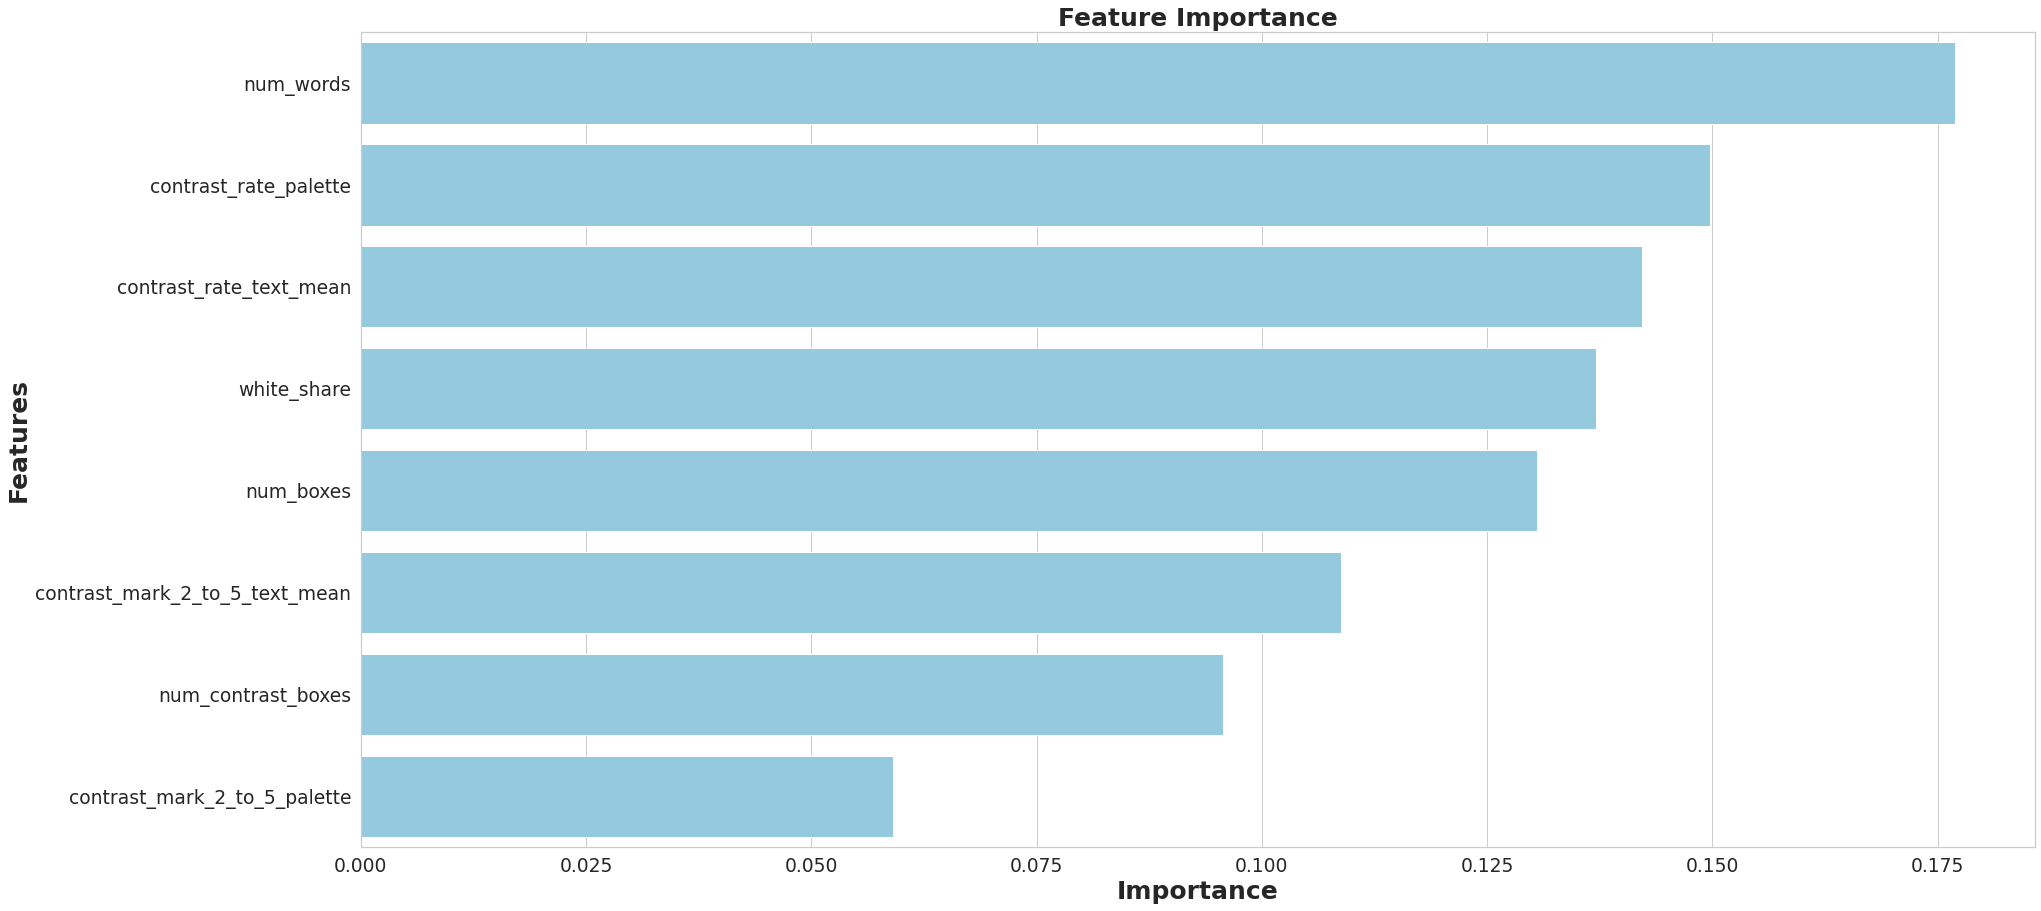

None

,Features,Gini-Importance
0,num_words,0.176916
1,contrast_rate_palette,0.149773
2,contrast_rate_text_mean,0.142144
3,white_share,0.137105
4,num_boxes,0.130492
5,contrast_mark_2_to_5_text_mean,0.108801
6,num_contrast_boxes,0.095693
7,contrast_mark_2_to_5_palette,0.059077


In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

feats = {}
#for feature, importance in zip(df_total.columns, rfc.feature_importances_):
for feature, importance in zip(features, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [697]:
#shap на x_test

In [ ]:
# light gbm
# xg boost
# catboost

### Метрики качества

http://bioinformaticsinstitute.ru/sites/default/files/vvedenie_v_mashinnoe_obuchenie.pdf

### Блок для тестирования

In [191]:
left = 1165
top = 918
right = 1222
bottom = 936 
#1165, 918, 1222, 936
im_crop = img_pil.crop((left, top, right, bottom))
cv2_crop = img[top:bottom, left:right]
im_crop

In [776]:
get_popular_colors(f"/home/lev/Desktop/data_management/jupyter_notebooks/img/cropped/110.jpg", 30**3)

[{'color': array([255.       , 255.       , 237.4137931]),
  'counts': 411,
  'shares': 0.46024636058230683},
 {'color': array([43.96551724, 43.96551724, 43.96551724]),
  'counts': 44,
  'shares': 0.04927211646136618},
 {'color': array([228.62068966, 228.62068966, 211.03448276]),
  'counts': 28,
  'shares': 0.03135498320268757}]

In [54]:
cv2.imshow('img', cv2_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()